# Yield Model Simulator for W2W hybrid bonding
#### Author: Zhichao Chen
#### Date: Aug 25, 2025
#### Description: YAP+ (pad-layout-aware yield analysis)

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
import numpy as np
from utils.util import *
import time
import matplotlib.pyplot as plt
from assembly_yield_simulator import Assembly_Yield_Simulator
from pad_bitmap_generation import pad_bitmap_generate_random

PAD_ARR_ROW: 10000
PAD_ARR_COL: 10000
Number of pad blocks: 625
Pad block size: 400
Number of critical pad blocks: 624
Number of redundant pad blocks: 1
Number of dummy pad blocks: 0
Processing redundant block 1/1...  cluster size: 100
Pad bitmap collections info saved.
Processing point 1/10...
Processing die 10/540...
Time taken for every 10 dies: 5.43 seconds
Processing die 20/540...
Time taken for every 10 dies: 5.82 seconds
Processing die 30/540...
Time taken for every 10 dies: 6.29 seconds
Processing die 40/540...
Time taken for every 10 dies: 6.25 seconds
Processing die 50/540...
Time taken for every 10 dies: 6.19 seconds
Processing die 60/540...
Time taken for every 10 dies: 6.06 seconds
Processing die 70/540...
Time taken for every 10 dies: 5.99 seconds
Processing die 80/540...
Time taken for every 10 dies: 6.41 seconds
Processing die 90/540...
Time taken for every 10 dies: 6.37 seconds
Processing die 100/540...
Time taken for every 10 dies: 6.32 seconds
Processing die 110/540.

KeyboardInterrupt: 

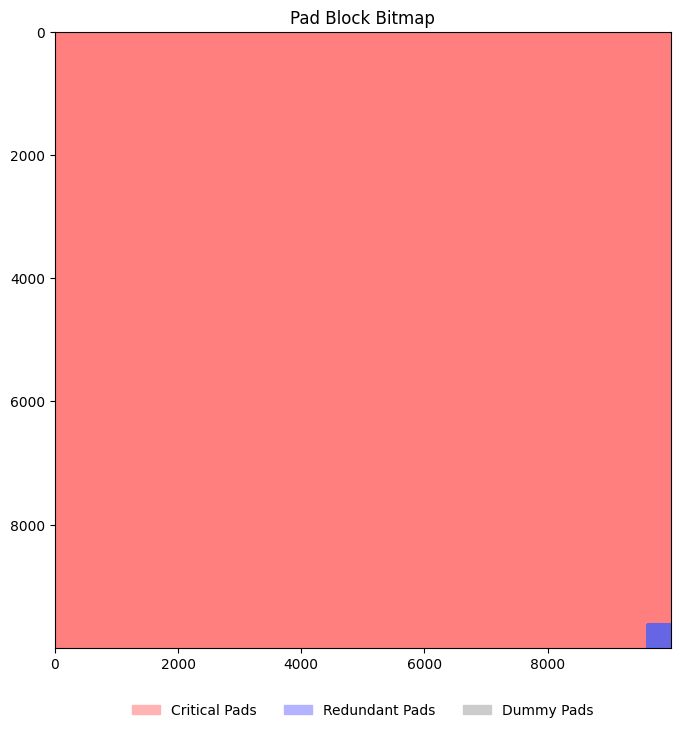

In [8]:
# Load configuration
cfg = load_modeling_config(path='configs/config.yaml', 
                     mode='w2w_simulation',
                     debug=False)
num_points = 10     # Number of points for parameter sweep
# Explore the impact of all factors on the assembly yield
die_size_list = np.linspace(1e4, 1e4, num_points)
pitch_list = np.linspace(1, 1, num_points)
particle_density_list = np.logspace(-9, -9, num_points)
t_0_list = np.linspace(0.1, 0.1, num_points)
dish_std_list = np.linspace(1, 1, num_points)
translation_list = np.linspace(0, 0, num_points)
rotation_mean_list = np.linspace(5e-8, 5e-8, num_points)
Roughness_sigma_list = np.linspace(1.0e-9, 1.0e-9, num_points)
PAD_BOT_R_ratio_list = np.linspace(0.5, 0.5, num_points)
PAD_TOP_R_ratio_list = np.linspace(2/3, 2/3, num_points)
bow_difference_mean_list = np.linspace(0.5, 0.5, num_points)

assembly_yield_list = []

# Generate pad bitmap collection
pad_bitmap_collection = pad_bitmap_generate_random(cfg=cfg)  

start_time = time.time()
cfg.NUM_WAFERS = 10
single_config_yield_list_array = np.zeros([len(particle_density_list), cfg.simulation_times * cfg.NUM_WAFERS])
for i in range(num_points):
    print("Processing point {}/{}...".format(i + 1, num_points))
    # Update parameters
    cfg.DIE_W = float(die_size_list[i])  # die width (um)
    cfg.DIE_L = float(die_size_list[i])  # die length (um)
    cfg.PITCH = float(pitch_list[i])  # pitch (um)
    cfg.PAD_TOP_R_ratio = float(PAD_TOP_R_ratio_list[i])  # top Cu pad radius ratio
    cfg.PAD_BOT_R_ratio = float(PAD_BOT_R_ratio_list[i])  # bottom Cu pad radius ratio
    cfg.SYSTEM_TRANSLATION_X_MEAN = float(translation_list[i])  # systematic translation mean (um) - x direction
    cfg.SYSTEM_TRANSLATION_Y_MEAN = float(translation_list[i])  # systematic translation mean (um) - y direction
    cfg.SYSTEM_ROTATION_MEAN = float(rotation_mean_list[i])  # systematic rotation mean (rad)
    cfg.D0 = float(particle_density_list[i])  # particle density (um^{-2})
    cfg.t_0 = float(t_0_list[i])  # smallest particle thickness (um)
    cfg.BOW_DIFFERENCE_MEAN = float(bow_difference_mean_list[i])  # bow difference mean (um)
    cfg.TOP_DISH_STD = float(dish_std_list[i])  # Top Cu pad dish standard deviation (nm)
    cfg.BOT_DISH_STD = float(dish_std_list[i])  # Bottom Cu pad dish standard deviation (nm)
    cfg.Roughness_sigma = float(Roughness_sigma_list[i])  # Surface roughness standard deviation (m)
    # Update above parameters in the configuration
    update_config_items(cfg=cfg, mode='w2w_simulation')
    assembly_yield, single_config_yield_list = Assembly_Yield_Simulator(
        cfg=cfg,
        pad_bitmap_collection=pad_bitmap_collection,                                    
    )
                                                                        
    assembly_yield_list.append(assembly_yield)
    single_config_yield_list_array[i] = np.array(single_config_yield_list).flatten()
print("Total time taken: {:.2f} seconds".format(time.time() - start_time))

In [ ]:
np.save('sim_df_yield_list_pd_-10_-8d1_size_1e4_300params_200dim.npy', assembly_yield_list)

[0.6678631229177094,
 0.6668266431792271,
 0.6681962771193644,
 0.663606152563229,
 0.6633100154950913,
 0.6654570092390901,
 0.6638652724978494,
 0.6618663472879195,
 0.6645685980346768,
 0.6621624843560574]

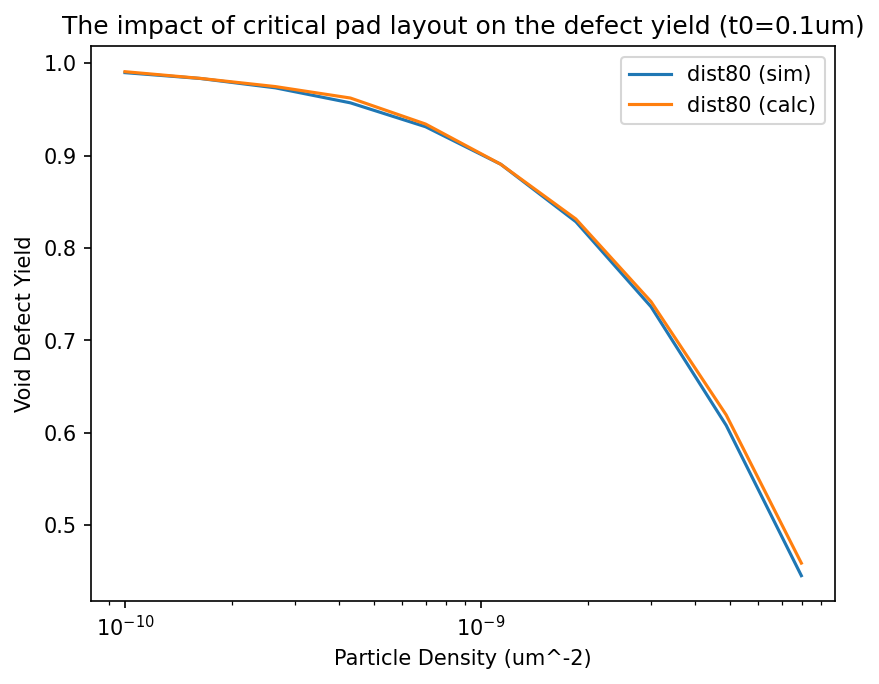

In [ ]:
particle_density_list = np.logspace(-10, -8.1, 10)
redundant_2copy_yield_dist80_critical_simulate = [0.9898717150057933,
 0.9835840362219836,
 0.9734456446297147,
 0.9571835960590951,
 0.9313200288008368,
 0.8907502895065961,
 0.8285237929258553,
 0.7364898897985741,
 0.608160052042089,
 0.44547230967179824]
redundant_2copy_yield_dist80_critical_calculate = [0.9909259259259258,
 0.9837037037037037,
 0.9748148148148147,
 0.9624074074074075,
 0.9342592592592593,
 0.8907407407407408,
 0.8314814814814815,
 0.742037037037037,
 0.6194444444444445,
 0.4590740740740741]
redundant_2copy_yield_dist80_critical_simulate = np.array(redundant_2copy_yield_dist80_critical_simulate)
redundant_2copy_yield_dist80_critical_calculate = np.array(redundant_2copy_yield_dist80_critical_calculate)
# plot the calculated yield vs. the simulated yield
plt.figure(dpi=150)
plt.plot(particle_density_list, redundant_2copy_yield_dist80_critical_simulate, label='dist80 (sim)')
plt.plot(particle_density_list, redundant_2copy_yield_dist80_critical_calculate, label='dist80 (calc)')
plt.xscale('log')
plt.xlabel('Particle Density (um^-2)')
plt.ylabel('Void Defect Yield')
plt.title('The impact of critical pad layout on the defect yield (t0=0.1um)')
plt.legend()
plt.show()


### Y_sim v.s. Y_calc -> pad_block_size = 200 um

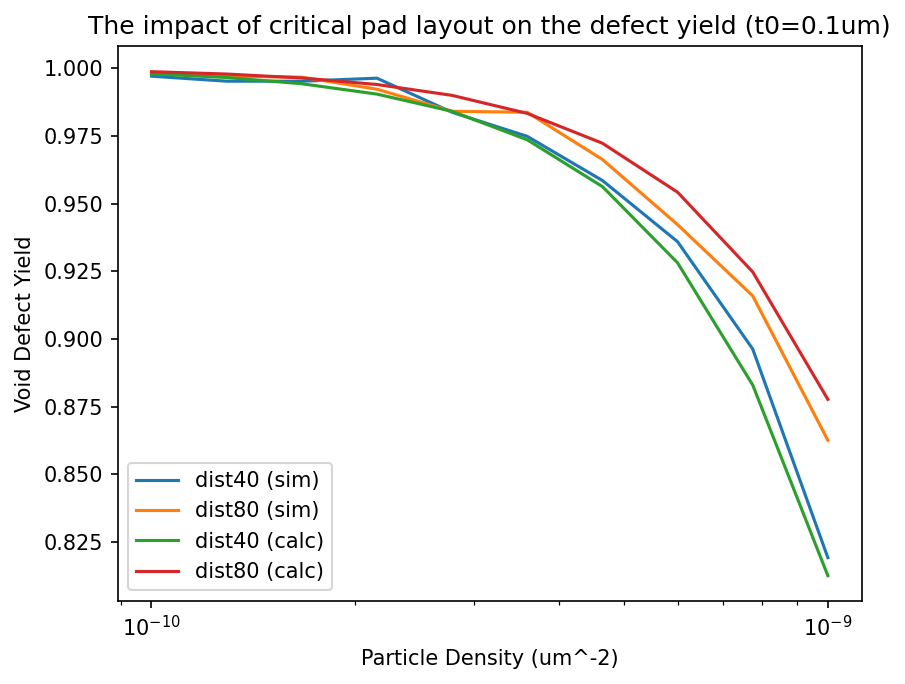

In [ ]:
particle_density_list = np.logspace(-10, -9, 10)
redundant_2copy_yield_dist40_critical_simulate = [0.9970370370370372,
 0.9951851851851853,
 0.9951851851851851,
 0.9962962962962963,
 0.9837037037037037,
 0.9748148148148148,
 0.9585185185185185,
 0.9359259259259259,
 0.8962962962962964,
 0.8192592592592594]
redundant_2copy_yield_dist80_critical_simulate = [0.9981481481481481,
 0.9970370370370369,
 0.9966666666666667,
 0.9922222222222221,
 0.984074074074074,
 0.9837037037037037,
 0.9662962962962963,
 0.9422222222222223,
 0.915925925925926,
 0.8625925925925927]
redundant_2copy_yield_dist40_critical_calculate = [0.9979268444252244,
 0.9965441635793376,
 0.9942419748401686,
 0.9904135217896465,
 0.9840600547330917,
 0.973552401638131,
 0.9562736659018274,
 0.928130727641162,
 0.8830164770269793,
 0.8125882513306562]
redundant_2copy_yield_dist80_critical_calculate = [0.9986962328735638,
 0.9978261326761374,
 0.996376404681686,
 0.9939627983089665,
 0.989949663997837,
 0.9832913772390017,
 0.9722841928175462,
 0.9541966166159586,
 0.9247704073078236,
 0.8776900402331577]
# redundant_2copy_yield_dist20_critical_simulate = np.array(redundant_2copy_yield_dist20_critical_simulate)
redundant_2copy_yield_dist40_critical_simulate = np.array(redundant_2copy_yield_dist40_critical_simulate)
redundant_2copy_yield_dist80_critical_simulate = np.array(redundant_2copy_yield_dist80_critical_simulate)
# redundant_2copy_yield_dist20_critical_calculate = np.array(redundant_2copy_yield_dist20_critical_calculate)
redundant_2copy_yield_dist40_critical_calculate = np.array(redundant_2copy_yield_dist40_critical_calculate)
redundant_2copy_yield_dist80_critical_calculate = np.array(redundant_2copy_yield_dist80_critical_calculate)
# redundant_2copy_yield_dist120_critical_calculate = np.array(redundant_2copy_yield_dist120_critical_calculate)
# plot the calculated yield vs. the simulated yield
plt.figure(dpi=150)
# plt.plot(particle_density_list, redundant_2copy_yield_dist20_critical_simulate, label='dist20 (sim)')
plt.plot(particle_density_list, redundant_2copy_yield_dist40_critical_simulate, label='dist40 (sim)')
plt.plot(particle_density_list, redundant_2copy_yield_dist80_critical_simulate, label='dist80 (sim)')
# plt.plot(particle_density_list, redundant_2copy_yield_dist120_critical_simulate, label='dist120 (sim)')
# plt.plot(particle_density_list, redundant_2copy_yield_dist20_critical_calculate, label='dist20 (calc)')
plt.plot(particle_density_list, redundant_2copy_yield_dist40_critical_calculate, label='dist40 (calc)')
plt.plot(particle_density_list, redundant_2copy_yield_dist80_critical_calculate, label='dist80 (calc)')
# plt.plot(particle_density_list, redundant_2copy_yield_dist120_critical_calculate, label='dist120 (calc)')
plt.xscale('log')
plt.xlabel('Particle Density (um^-2)')
plt.ylabel('Void Defect Yield')
plt.title('The impact of critical pad layout on the defect yield (t0=0.1um)')
plt.legend()
plt.show()


### Y_sim v.s. Y_calc -> pad_block_size = 400 um

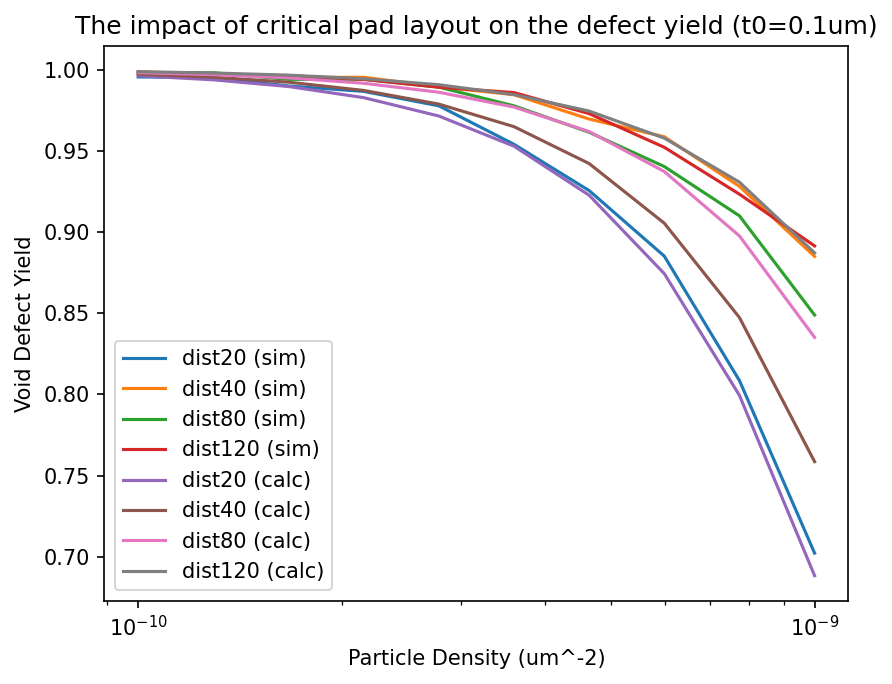

In [ ]:
particle_density_list = np.logspace(-10, -9, 10)
redundant_2copy_yield_dist20_critical_simulate = [0.9955555555555555,
 0.9951851851851853,
 0.9899999999999999,
 0.9866666666666666,
 0.9777777777777776,
 0.9540740740740741,
 0.9255555555555555,
 0.8851851851851851,
 0.8085185185185185,
 0.7022222222222221]
redundant_2copy_yield_dist40_critical_simulate = [0.9987037037037038,
 0.9974074074074075,
 0.9951851851851851,
 0.9953703703703702,
 0.9894444444444443,
 0.9846296296296295,
 0.9696296296296296,
 0.9587037037037037,
 0.9281481481481482,
 0.885]
redundant_2copy_yield_dist80_critical_simulate = [0.9981481481481481,
 0.9981481481481481,
 0.9940740740740741,
 0.9940740740740741,
 0.9892592592592593,
 0.9777777777777776,
 0.9614814814814816,
 0.9403703703703703,
 0.9100000000000001,
 0.8488888888888889]
redundant_2copy_yield_dist120_critical_simulate = [0.9985185185185184,
 0.9974074074074075,
 0.9962962962962963,
 0.994074074074074,
 0.9892592592592593,
 0.9859259259259259,
 0.9729629629629629,
 0.9522222222222222,
 0.9233333333333332,
 0.8914814814814814]
redundant_2copy_yield_dist20_critical_calculate = [0.9962719706268514,
 0.9937890198858643,
 0.9896609713716195,
 0.9828130944857648,
 0.9714954283081776,
 0.9529057049927289,
 0.922684387438409,
 0.8743899907397026,
 0.7993893819204969,
 0.688321275800331]
redundant_2copy_yield_dist40_critical_calculate = [0.9972405468188179,
 0.9954011990317654,
 0.9923405284682401,
 0.9872559504564457,
 0.978832272329579,
 0.964940370269552,
 0.9422046349936692,
 0.9054649732314973,
 0.8473397577488223,
 0.7585650298472465]
redundant_2copy_yield_dist80_critical_calculate = [0.9981998313899894,
 0.9969989438960519,
 0.9949989569652272,
 0.9916717016993505,
 0.9861462465825459,
 0.9769976582449255,
 0.9619253718696205,
 0.9372989418683182,
 0.8976145590805416,
 0.8351206395453719]
redundant_2copy_yield_dist120_critical_calculate = [0.9988033526970544,
 0.9980046700297118,
 0.996673808015505,
 0.9944577445723927,
 0.9907720874491673,
 0.9846544132303667,
 0.9745334626951304,
 0.9578816704657115,
 0.9307355630722097,
 0.8871542724446094]
redundant_2copy_yield_dist20_critical_simulate = np.array(redundant_2copy_yield_dist20_critical_simulate)
redundant_2copy_yield_dist40_critical_simulate = np.array(redundant_2copy_yield_dist40_critical_simulate)
redundant_2copy_yield_dist80_critical_simulate = np.array(redundant_2copy_yield_dist80_critical_simulate)
redundant_2copy_yield_dist20_critical_calculate = np.array(redundant_2copy_yield_dist20_critical_calculate)
redundant_2copy_yield_dist40_critical_calculate = np.array(redundant_2copy_yield_dist40_critical_calculate)
redundant_2copy_yield_dist80_critical_calculate = np.array(redundant_2copy_yield_dist80_critical_calculate)
redundant_2copy_yield_dist120_critical_calculate = np.array(redundant_2copy_yield_dist120_critical_calculate)
# plot the calculated yield vs. the simulated yield
plt.figure(dpi=150)
plt.plot(particle_density_list, redundant_2copy_yield_dist20_critical_simulate, label='dist20 (sim)')
plt.plot(particle_density_list, redundant_2copy_yield_dist40_critical_simulate, label='dist40 (sim)')
plt.plot(particle_density_list, redundant_2copy_yield_dist80_critical_simulate, label='dist80 (sim)')
plt.plot(particle_density_list, redundant_2copy_yield_dist120_critical_simulate, label='dist120 (sim)')
plt.plot(particle_density_list, redundant_2copy_yield_dist20_critical_calculate, label='dist20 (calc)')
plt.plot(particle_density_list, redundant_2copy_yield_dist40_critical_calculate, label='dist40 (calc)')
plt.plot(particle_density_list, redundant_2copy_yield_dist80_critical_calculate, label='dist80 (calc)')
plt.plot(particle_density_list, redundant_2copy_yield_dist120_critical_calculate, label='dist120 (calc)')
plt.xscale('log')
plt.xlabel('Particle Density (um^-2)')
plt.ylabel('Void Defect Yield')
plt.title('The impact of critical pad layout on the defect yield (t0=0.1um)')
plt.legend()
plt.show()